 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [18]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [8]:
class My_Video():
    def __init__(self, title, quality, duration, cast, genre, captioning):
        self.title = title
        self.quality = quality
        self.duration = duration
        self.cast = cast
        self.genre = genre
        self.captionion = captioning
        
    def change_video(self):
        new_show = input("What would you like to watch? ")
        self.title = new_show
        print(f"You are now watching, {self.title}!!")
        
    def closedCaptions(self):
        if self.captioning == False:
            self.captioning == True
            print("Closed captions have been turned on")
        elif self.captioning == True:
            self.captioning == False
            print("Closed captions have been turned off")
            
    def add_cast(self):
        cast_switch = input("Which cast would you like add: ")
        self.cast.append(cast_switch)
        print(f"The {self.title} has now a new member {cast_switch}. Welcome {cast_switch}!")
            
    def newDuration(self):
        dura = int(input("What is the duration of your video? (Cannot be over 10 minutes)"))
        if dura <= 10:
            duration = dura
            print(f"Your video is {dura} minutes long")
        else:
            print("Your video is too long!")
           
    def limited_bandwidth(self):
        self.quality = '480p'
        print(f"Due to limited bandwidth, the max quality you can stream is {self.quality}")



new_video = My_Video("Cool Video", "1080", "90 min", ["Ryan", "Alex", "James", "Tenzin", "Kayla", "John"], "Spooky", True)

print(new_video.title)

new_video.change_video()

Cool Video
What would you like to watch? scrubs
You are now watching, scrubs!!


In [9]:
class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
            
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [10]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data["name"]
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_iamge

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [11]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query = ""):
        data = None #<-- in case the show doesn't come back
        while not data:
            if not query:
                query = input("What is the name of the series?")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
                    
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ''
            
                    
        # Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
        
        

In [12]:
first_show = Series()

first_show.get_info()

What is the name of the series?scrubs
{'id': 532, 'url': 'https://www.tvmaze.com/shows/532/scrubs', 'name': 'Scrubs', 'type': 'Scripted', 'language': 'English', 'genres': ['Drama', 'Comedy', 'Medical'], 'status': 'Ended', 'runtime': 30, 'averageRuntime': 30, 'premiered': '2001-10-02', 'ended': '2010-03-17', 'officialSite': 'http://abc.go.com/', 'schedule': {'time': '20:00', 'days': ['Wednesday']}, 'rating': {'average': 8.6}, 'weight': 96, 'network': {'id': 3, 'name': 'ABC', 'country': {'name': 'United States', 'code': 'US', 'timezone': 'America/New_York'}, 'officialSite': 'https://abc.com/'}, 'webChannel': None, 'dvdCountry': None, 'externals': {'tvrage': 5118, 'thetvdb': 76156, 'imdb': 'tt0285403'}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/4/11371.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/4/11371.jpg'}, 'summary': '<p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, 

Now playing My First Day


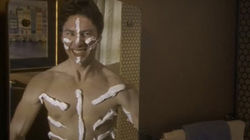

Now playing My Mentor


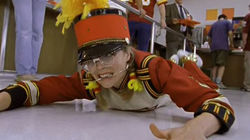

Now playing My Best Friend's Mistake


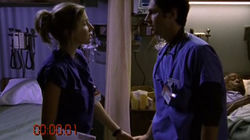

Are you still watching? also get a job y/ny
Now playing My Old Lady


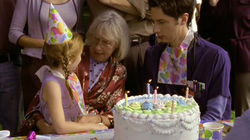

Now playing My Two Dads


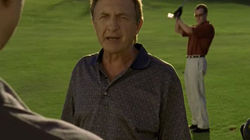

Now playing My Bad


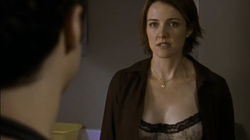

Are you still watching? also get a job y/nn


In [13]:
first_show.watch()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [1]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
            
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        

    def get_info(self, query=''):
        data = None #<-- in case we cant find the show we're looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                     print(data)
                else: 
                    print(f"Series error: status code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code {r.status_code}")
                
        #Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
                
                
        # Api call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
     

class Theater():
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    #add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    #choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user")
    
    #add to watchlist
    def add_to_watchlist(self, query = ''):
        show = Series()
        show.get_info(query)
        
        self.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist!")
        
    #choose from watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:            
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
        
        watch = input("What would you like to watch? ")
        
#         if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
        for series in self.watch_list:
            if series.title.lower() == watch.lower().strip():
                series.watch()
                break
            
                           
        else:
      
            response = input(f"{watch} is not in your watch list....would you like to add it... y/n?")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)

                print("............")
                sleep(2)
                print("............")
                self.watch_list[-1].watch()
                
    # run function to drive the program
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
            What would you like to do?
            Search - Search for shows
            Watch - Pick something from your watchlist
            Add - add a new user
            Quit - close the application
            
            """)
            
        while True:
            response = input("What would you like to do? (search, watch, add, quit) ")
            
            if response.lower() == "search":
                self.add_to_watchlist()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside!")
                break
            else:
                print("Invalid Inpu: please choose from the list!")

In [ ]:
# ^^^^^^ This cell is the code before I made changes for the homework

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [17]:
#To improve the streaming service I added a history field that takes in the number of episodes watched per show, 
#and when you come back to that show, you can pick up where you left off or start over.


from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
            
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        self.history = []
        

    def get_info(self, query=''):
        data = None #<-- in case we cant find the show we're looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                     print(data)
                else: 
                    print(f"Series error: status code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code {r.status_code}")
                
        #Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
                
                
        # Api call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        if len(self.history) > 0:
            returning_viewer = input(f"Would you like to pick up where you left off? y/n (You are currently on Episode {len(self.history) + 1})")
            if returning_viewer.lower() in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                first_check = False
                for i in range(len(self.history), len(self.episodes)):
                    if first_check == True and i % 3 == 0:
                        watching = input("Are you still watching? also get a job y/n")
                        if watching.lower().strip() not in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                            break
                    first_check = True
                    self.history.append(i)
                    self.episodes[i].play()
                    sleep(self.episodes[i].length.seconds/1000)
            else:
                self.history = []
                for i in range(len(self.episodes)):
                    if i > 0 and i % 3 == 0:
                        watching = input("Are you still watching? also get a job y/n")
                        if watching.lower().strip() not in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                            break
                    self.history.append(i)
                    self.episodes[i].play()
                    sleep(self.episodes[i].length.seconds/1000)
        else:
            for i in range(len(self.episodes)):
                if i > 0 and i % 3 == 0:
                    watching = input("Are you still watching? also get a job y/n")
                    if watching.lower().strip() not in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                        break
                self.history.append(i)
                self.episodes[i].play()
                sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
     

class Theater():
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    #add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    #choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user")
    
    #add to watchlist
    def add_to_watchlist(self, query = ''):
        show = Series()
        show.get_info(query)
        
        self.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist!")
        
    #choose from watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:            
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
        
        watch = input("What would you like to watch? ")
        
#         if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
        for series in self.watch_list:
            if series.title.lower() == watch.lower().strip():
                series.watch()
                break
            
                           
        else:
      
            response = input(f"{watch} is not in your watch list....would you like to add it... y/n?")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)

                print("............")
                sleep(2)
                print("............")
                self.watch_list[-1].watch()
                
    # run function to drive the program
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
            What would you like to do?
            Search - Search for shows
            Watch - Pick something from your watchlist
            Add - add a new user
            Quit - close the application
            
            """)
            
        while True:
            response = input("What would you like to do? (search, watch, add, quit) ")
            
            if response.lower() == "search":
                self.add_to_watchlist()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside!")
                break
            else:
                print("Invalid Input: please choose from the list!")

In [18]:
codeflix = Theater()

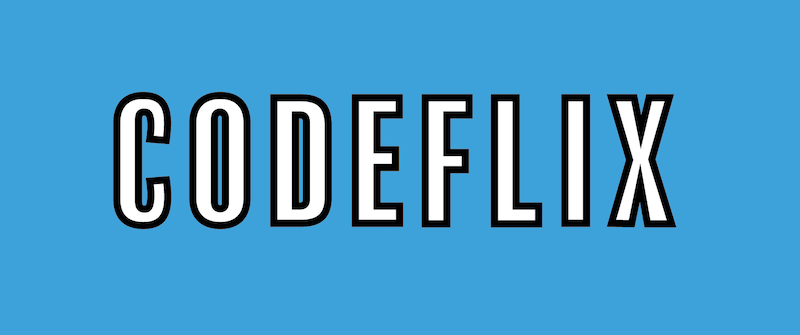

Users: 
James
Choose a user: james
What would you like to do? (search, watch, add, quit) watch


Title: Scrubs | Episodes: 182

Summary: 
 <p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, and Elliot Reid start their internship at Sacred Heart Hospital. There, they meet the harsh Chief of Medicine Dr. Bob Kelso, J.D.'s reluctant mentor Dr. Perry Cox, nurse Carla Espinosa, and the deceitful and prankish Janitor. Also at the hospital are the wide range of personalities of Sacred Heart's staff, including the religious nurse Laverne Roberts, incompetent lawyer Ted Buckland, and spiteful board member Jordan Sullivan who also happens to be Cox's ex-wife. Other interns make the cut, such as the high-fiving Todd Quinlan and nervous Doug Murphy. Over the next 9 years they face personal and professional highs and lows, realizing that they can't make it through life - much less a hectic job as a doctor - on their own.</p>


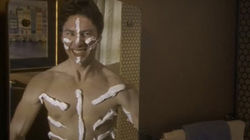

What would you like to watch? lost
lost is not in your watch list....would you like to add it... y/n?y
Lost has 121 episodes
Lost has been added to the watchlist!
............
............
Now playing Pilot (1)


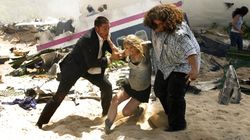

Now playing Pilot (2)


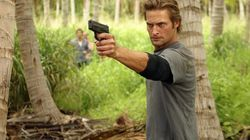

Now playing Tabula Rasa


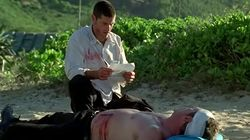

Are you still watching? also get a job y/ny
Now playing Walkabout


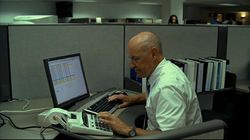

Now playing White Rabbit


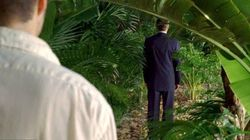

Now playing House of the Rising Sun


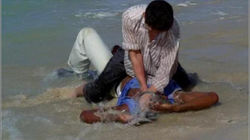

Are you still watching? also get a job y/nn
What would you like to do? (search, watch, add, quit) watch


Title: Scrubs | Episodes: 182

Summary: 
 <p>Fresh out of medical school, new doctors John "J.D." Dorian, his best friend Christopher Turk, and Elliot Reid start their internship at Sacred Heart Hospital. There, they meet the harsh Chief of Medicine Dr. Bob Kelso, J.D.'s reluctant mentor Dr. Perry Cox, nurse Carla Espinosa, and the deceitful and prankish Janitor. Also at the hospital are the wide range of personalities of Sacred Heart's staff, including the religious nurse Laverne Roberts, incompetent lawyer Ted Buckland, and spiteful board member Jordan Sullivan who also happens to be Cox's ex-wife. Other interns make the cut, such as the high-fiving Todd Quinlan and nervous Doug Murphy. Over the next 9 years they face personal and professional highs and lows, realizing that they can't make it through life - much less a hectic job as a doctor - on their own.</p>


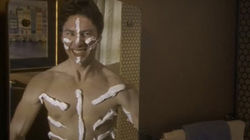



Title: Lost | Episodes: 121

Summary: 
 <p>Out of the blackness, the first thing Jack senses is pain. Then burning sun. A Bamboo forest. Smoke. Screams. With a rush comes the horrible awareness that the plane he was on tore apart in mid-air and crashed on a Pacific island. From there it's a blur, as his doctor's instinct kicks in: people need his help.</p><p>Stripped of everything, the 48 survivors scavenge what they can from the plane for their survival. Some panic. Some pin their hopes on rescue. A few find inner strength they never knew they had -- like Kate, who, with no medical training, suddenly finds herself suturing the doctor's wounds. Hurley - a man with a warm sense of humor despite the desperate situation - does his best to keep his cool as he helps those around him to survive. Charlie is a faded rock star who harbors a painful secret. Sayid is a Middle Eastern man who must wrestle with the racial profiling directed at him by some of his fellow survivors. Jin and Sun are 

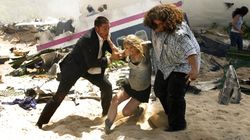

What would you like to watch? scrubs
Would you like to pick up where you left off? y/n (You are currently on Episode 4)y
Now playing My Old Lady


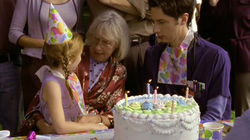

Now playing My Two Dads


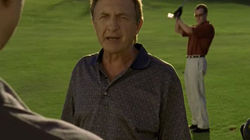

Now playing My Bad


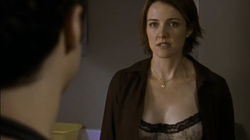

Are you still watching? also get a job y/ny
Now playing My Super Ego


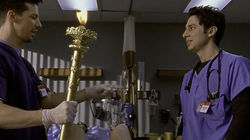

Now playing My Fifteen Minutes


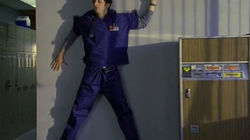

Now playing My Day Off


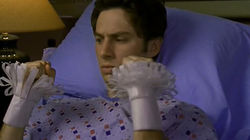

Are you still watching? also get a job y/nn
What would you like to do? (search, watch, add, quit) quit
Thanks for watching! james! Now go outside!


In [20]:
codeflix.run()